#Kavish Nag
#24070126085
#AIML B1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #evalution based of mean square error
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

In [4]:
df=pd.read_csv('/content/house_prediction.csv')
df

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,2014-10-07,353950.0,3,3,False,302.86378,False,False,False,2,True,False,10,1
13599,2014-08-08,289950.0,2,2,False,155.14801,False,False,False,2,True,False,8,2
13600,2014-07-17,625504.0,2,3,True,117.98681,False,False,False,2,True,False,7,4
13601,2014-11-26,730000.0,3,5,False,340.02498,False,False,False,2,True,False,11,4


<Axes: xlabel='price', ylabel='living_in_m2'>

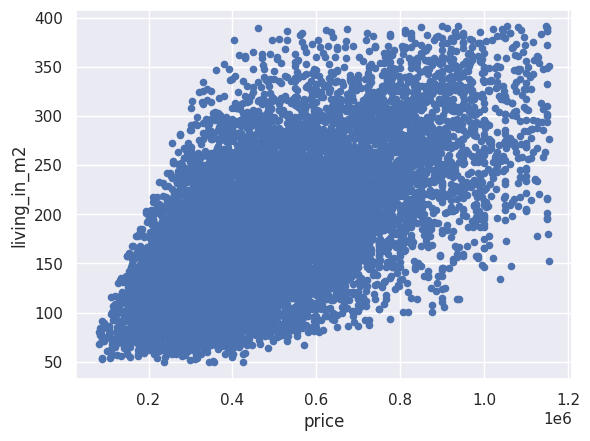

In [5]:
df.plot(kind='scatter', x='price', y='living_in_m2')

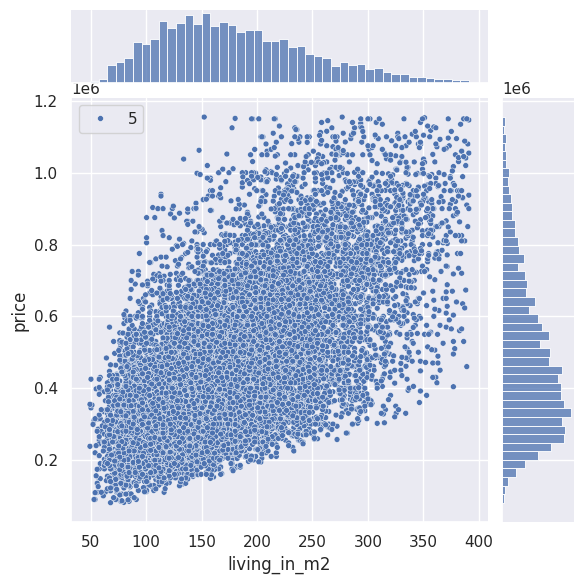

In [18]:
sns.jointplot(x='living_in_m2',y='price',data=df,size=5)

<Axes: xlabel='bedrooms', ylabel='price'>

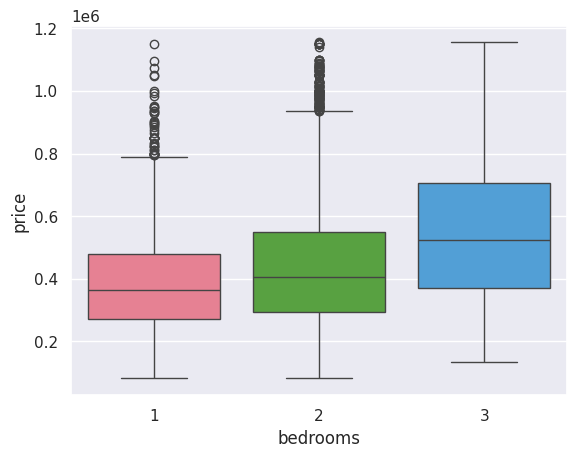

In [7]:
sns.boxplot(x='bedrooms',y='price',palette='husl',data=df)

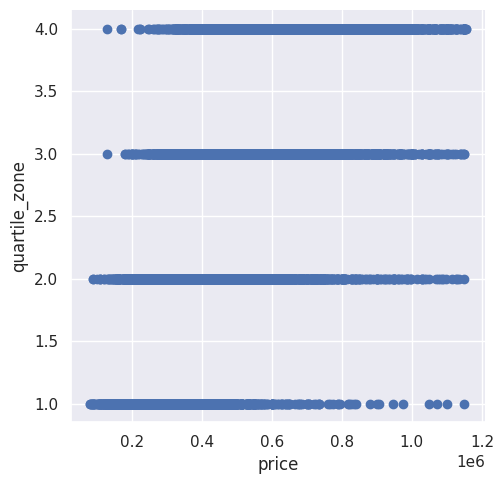

In [10]:
sns.FacetGrid(df,palette="husl",height=5).map(plt.scatter,'price','quartile_zone').add_legend()

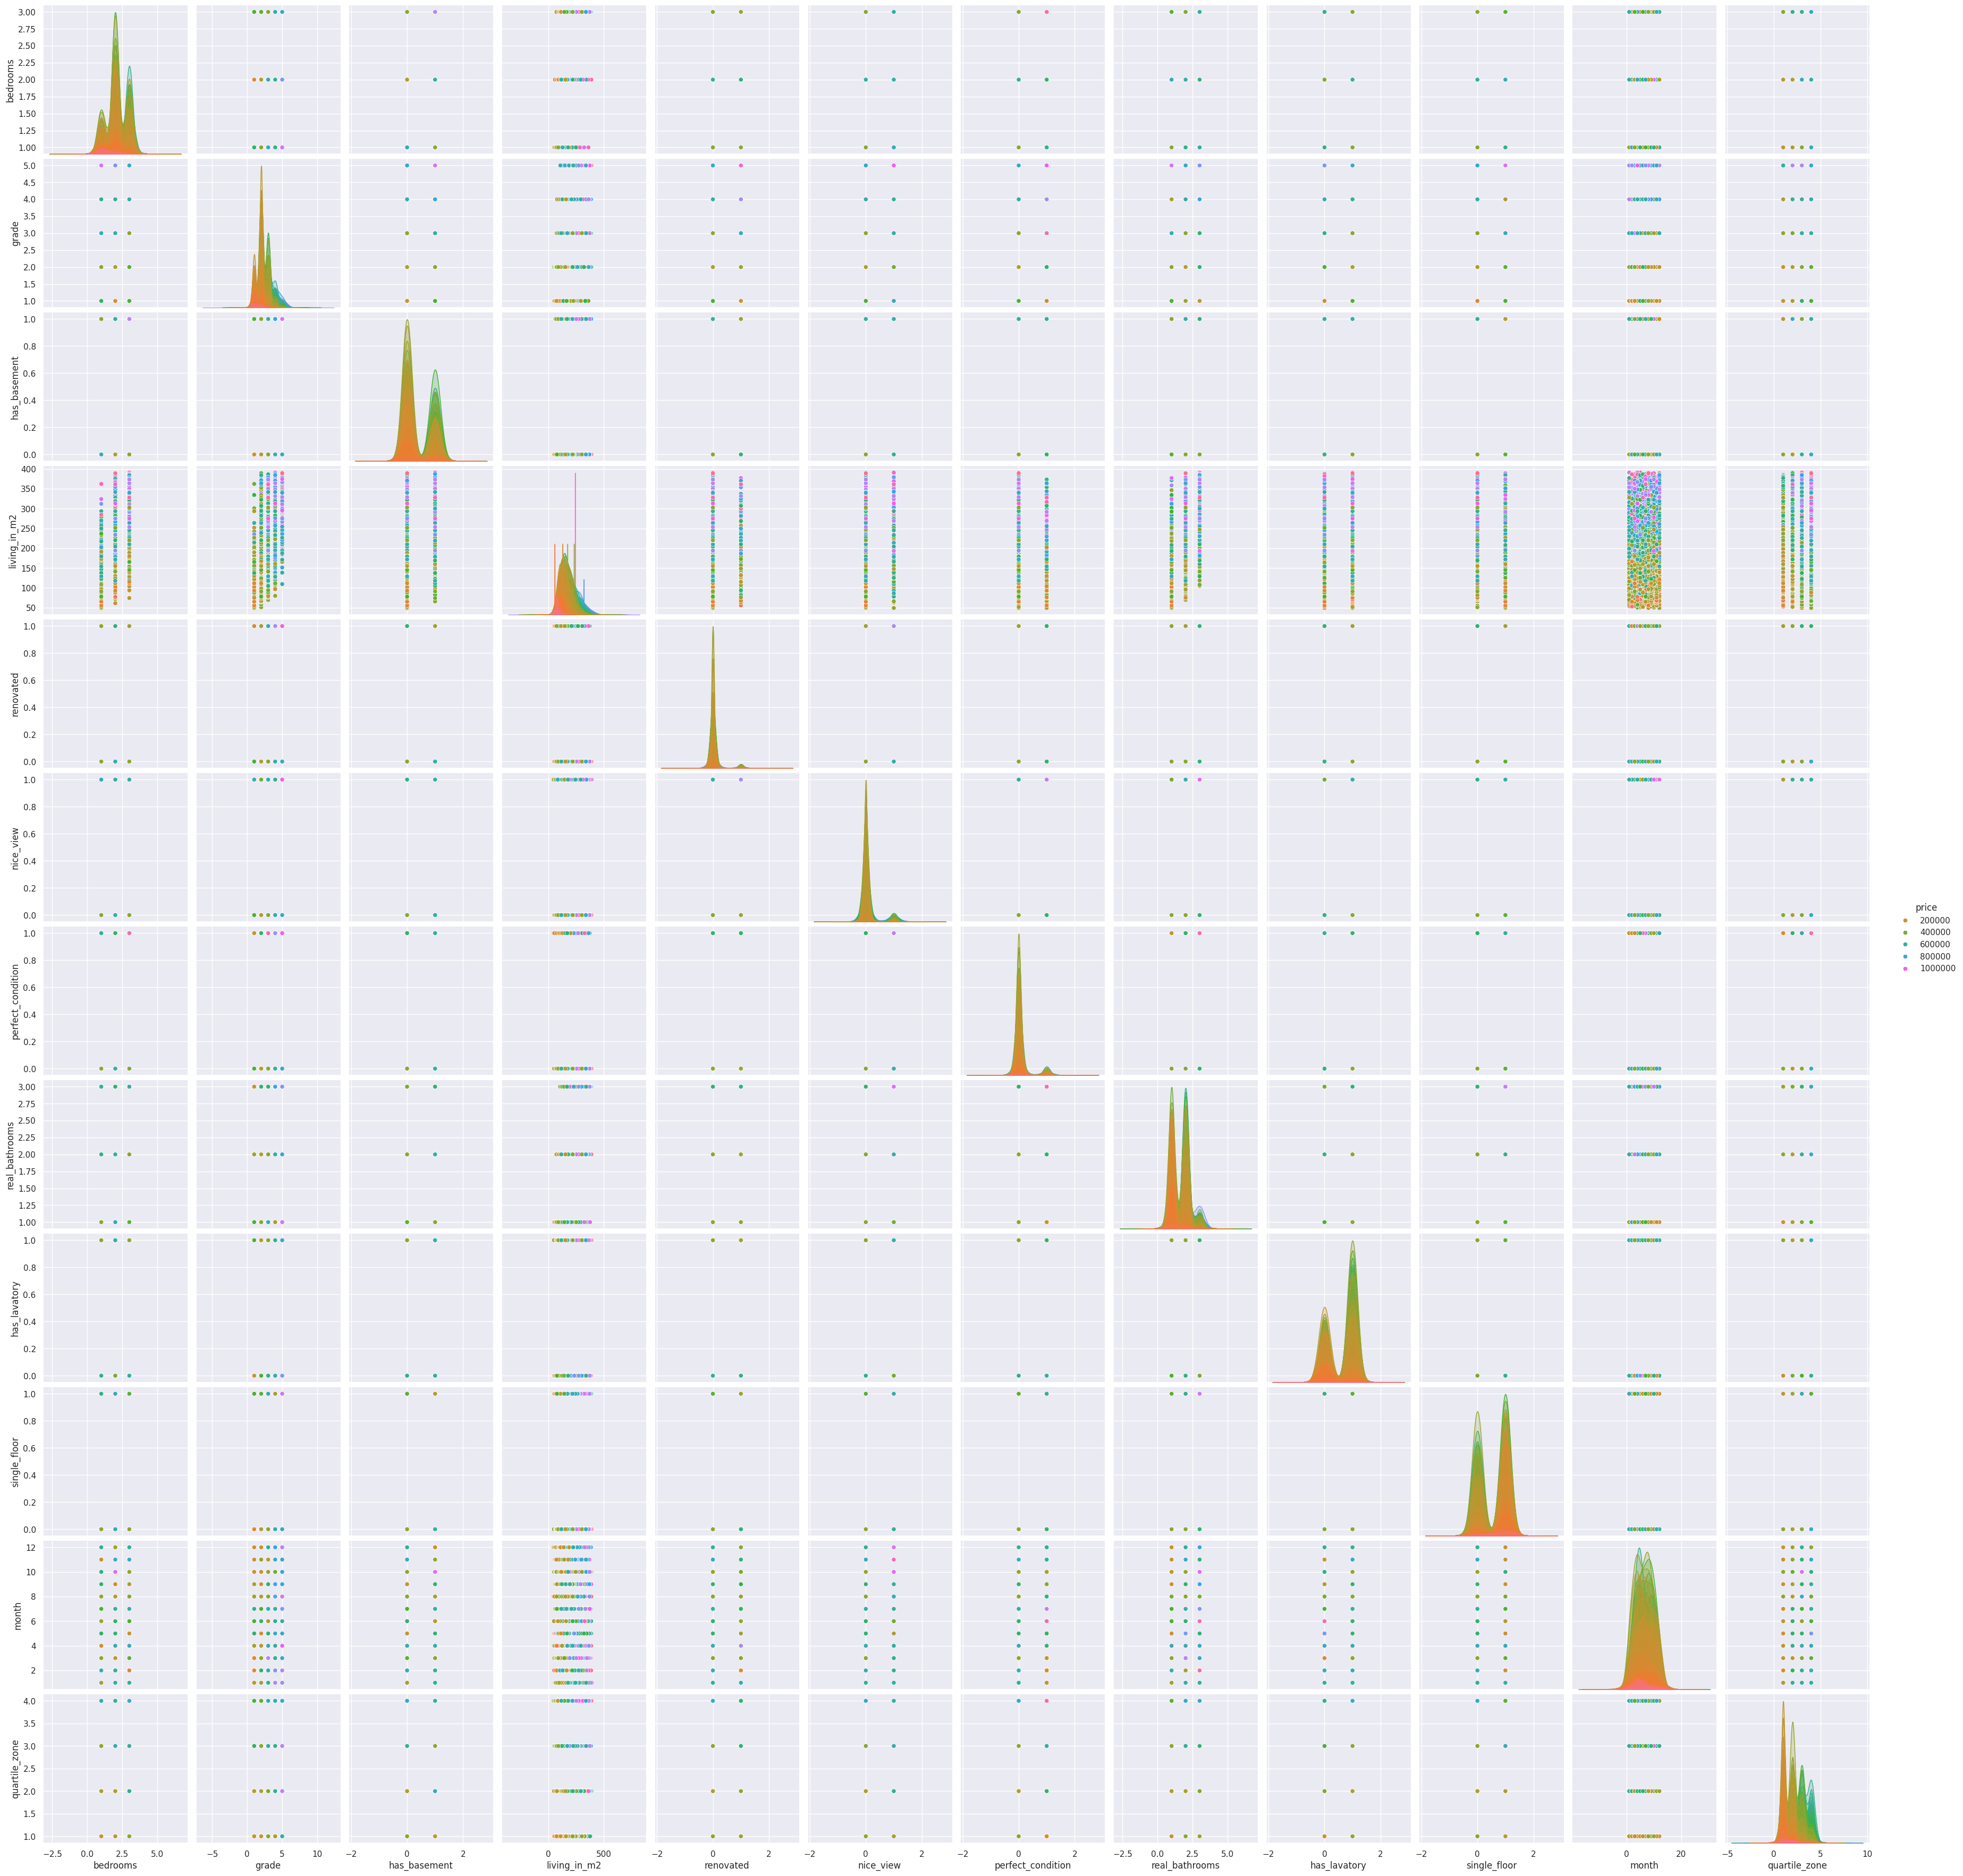

In [16]:
sns.pairplot(df,hue='price',palette='husl',size=3)

Mean Squared Error: 27110125100.528515
R2 scores: 0.3717033676143128


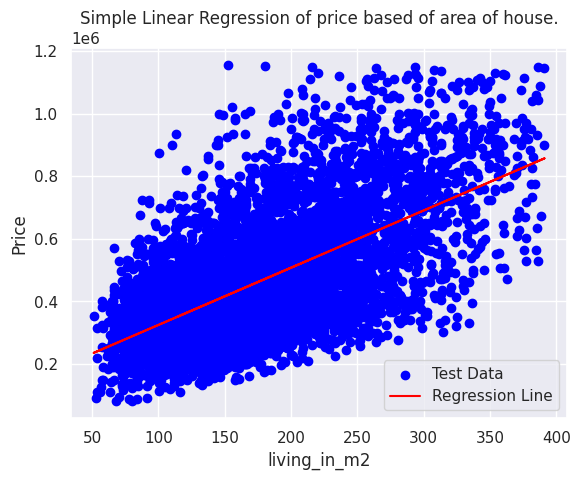

Intercept: 141792.86903443473
Slope: 1828.8874098189758
Mean Squared Error: 27110125100.528515


In [15]:
from sklearn import model_selection
X = df['living_in_m2'].values.reshape(-1, 1) #using 'area' as feature
y = df['price'].values #using 'price' as target

#split the dataset into training and testing (80% training and 20% testing)
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.8,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

#Linear regression model
model=LinearRegression()
model.fit(X_train,y_train) #fit the model
y_pred=model.predict(X_test) #predict the target values
mse = mean_squared_error(y_test, y_pred) #find mean_squared_error
r2_score=model.score(X_test,y_test)
print("Mean Squared Error:", mse)
print("R2 scores:",r2_score)

#Visualization
plt.scatter(X_test,y_test,color='blue',label='Test Data')
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.xlabel('living_in_m2')
plt.ylabel('Price')
plt.title('Simple Linear Regression of price based of area of house.')
plt.legend()
plt.show()

#print the coefficients (intercept and slope)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")